In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from sklearn.linear_model import LinearRegression
import datetime as dt

In [3]:
df = pd.read_csv(r'C:\Users\Syrym\Downloads\sales_data.csv', parse_dates=['date'])
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [25]:
print("Total Sales Per Payment Method")
df.groupby('payment')[['total']].sum()

Total Sales Per Payment Method


,total
payment,
Cash,19199.10
Credit card,110271.57
Transfer,159642.33


In [26]:
print("Average Unit Price per Product Line")
df.groupby('product_line')[['unit_price']].mean()

Average Unit Price per Product Line


,unit_price
product_line,
Breaking system,17.740522
Electrical system,25.585130
Engine,60.091803
Frame & body,42.832229
Miscellaneous,22.810738
Suspension & traction,33.969868


Demonstrating Payment Types and Product Lines


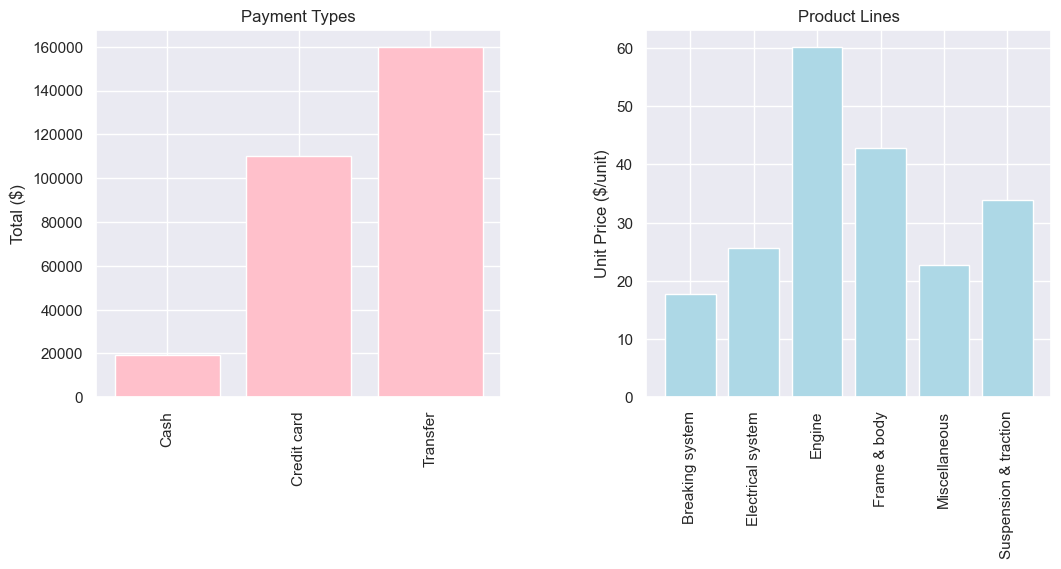

In [28]:
import matplotlib.pyplot as plt

print("Demonstrating Payment Types and Product Lines")
product_lines = df.groupby('product_line')[['unit_price']].mean()
payment_types = df.groupby('payment')[['total']].sum()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.tight_layout(pad=6.0)

# Plotting for Payment Types
axs[0].bar(payment_types.index, payment_types["total"], color='pink')
axs[0].set_xticks(range(len(payment_types.index))) # Setting the tick positions explicitly
axs[0].set_xticklabels(payment_types.index, rotation=90)
axs[0].set_ylabel("Total ($)")
axs[0].set_title('Payment Types')

# Plotting for Product Lines
axs[1].bar(product_lines.index, product_lines["unit_price"], color='lightblue')
axs[1].set_xticks(range(len(product_lines.index))) # Setting the tick positions explicitly
axs[1].set_xticklabels(product_lines.index, rotation=90)
axs[1].set_ylabel("Unit Price ($/unit)")
axs[1].set_title('Product Lines')

plt.show()


In [29]:
print("Average Purchase Price per Payment Type")
avg_purchase_clienttype = df.groupby('payment')[['total']].mean()
avg_purchase_clienttype

Average Purchase Price per Payment Type


,total
payment,
Cash,165.509483
Credit card,167.331669
Transfer,709.521467


In [31]:
print("Total Purchase Value per Product Line")
total_productline = df.groupby('product_line')[['total']].sum()
total_productline
total_productline

Total Purchase Value per Product Line


,total
product_line,
Breaking system,38350.15
Electrical system,43612.71
Engine,37945.38
Frame & body,69024.73
Miscellaneous,27165.82
Suspension & traction,73014.21


Metrics Cross Assessment Using Seaborn Pair Plots


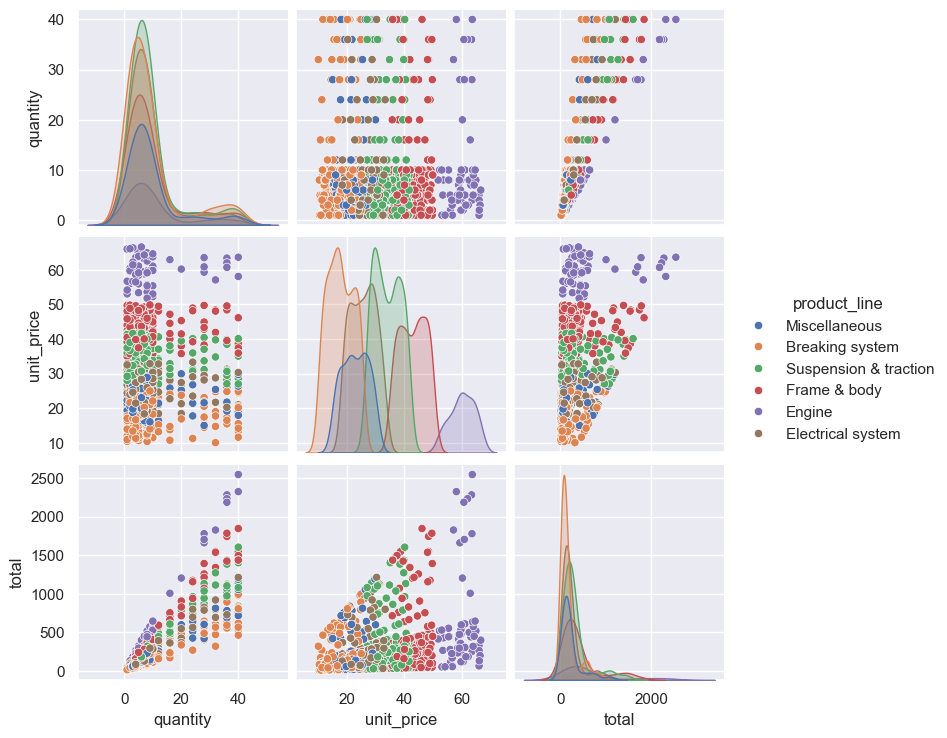

In [33]:
print("Metrics Cross Assessment Using Seaborn Pair Plots")
sns.set()
sns.pairplot(df, hue='product_line');

Looking at the data by client type


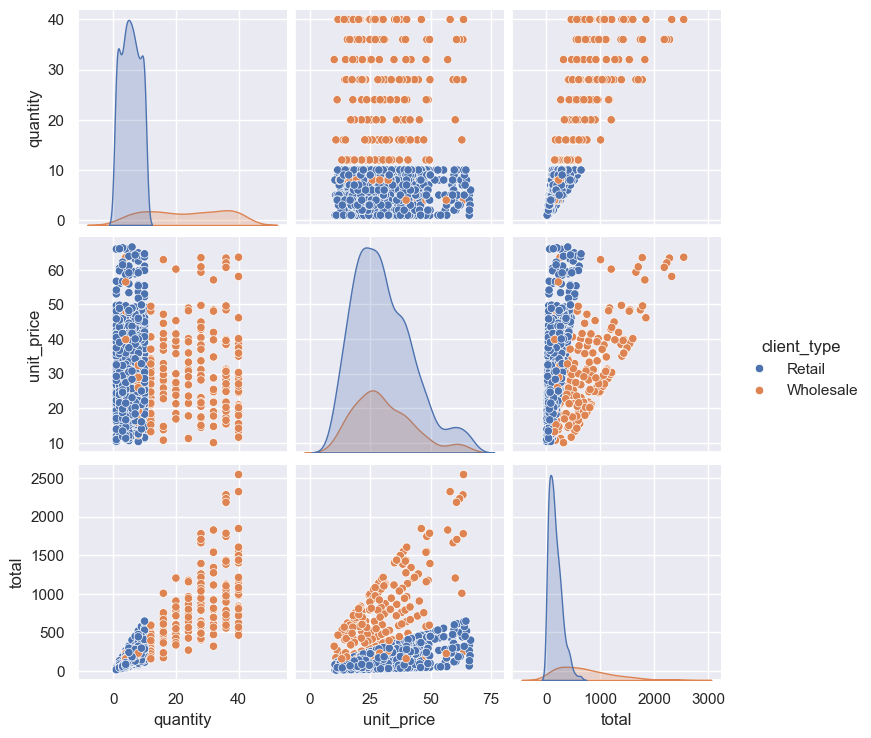

In [34]:
print("Looking at the data by client type")
sns.set()
sns.pairplot(df, hue='client_type');

In [12]:
timeseries_productline_total = df.groupby(['date','product_line'],as_index = False)[['total']].sum()


In [13]:
Breaking_system = timeseries_productline_total.groupby('product_line',as_index = False).get_group('Breaking system')
Electric_system = timeseries_productline_total.groupby('product_line',as_index = False).get_group('Electrical system')
Engine = timeseries_productline_total.groupby('product_line',as_index = False).get_group('Engine')
Frame_body = timeseries_productline_total.groupby('product_line',as_index = False).get_group('Frame & body')
Sus_trac = timeseries_productline_total.groupby('product_line',as_index = False).get_group('Suspension & traction')
Misc = timeseries_productline_total.groupby('product_line',as_index = False).get_group('Miscellaneous')

array = [Breaking_system, Electric_system, Engine, Frame_body, Sus_trac, Misc]

for a in array:
    b = a["total"].cumsum()
    a["cumTotal"] = b.to_list()

C:\Users\Syrym\AppData\Local\Temp\ipykernel_5296\3358372625.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["cumTotal"] = b.to_list()
C:\Users\Syrym\AppData\Local\Temp\ipykernel_5296\3358372625.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["cumTotal"] = b.to_list()
C:\Users\Syrym\AppData\Local\Temp\ipykernel_5296\3358372625.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

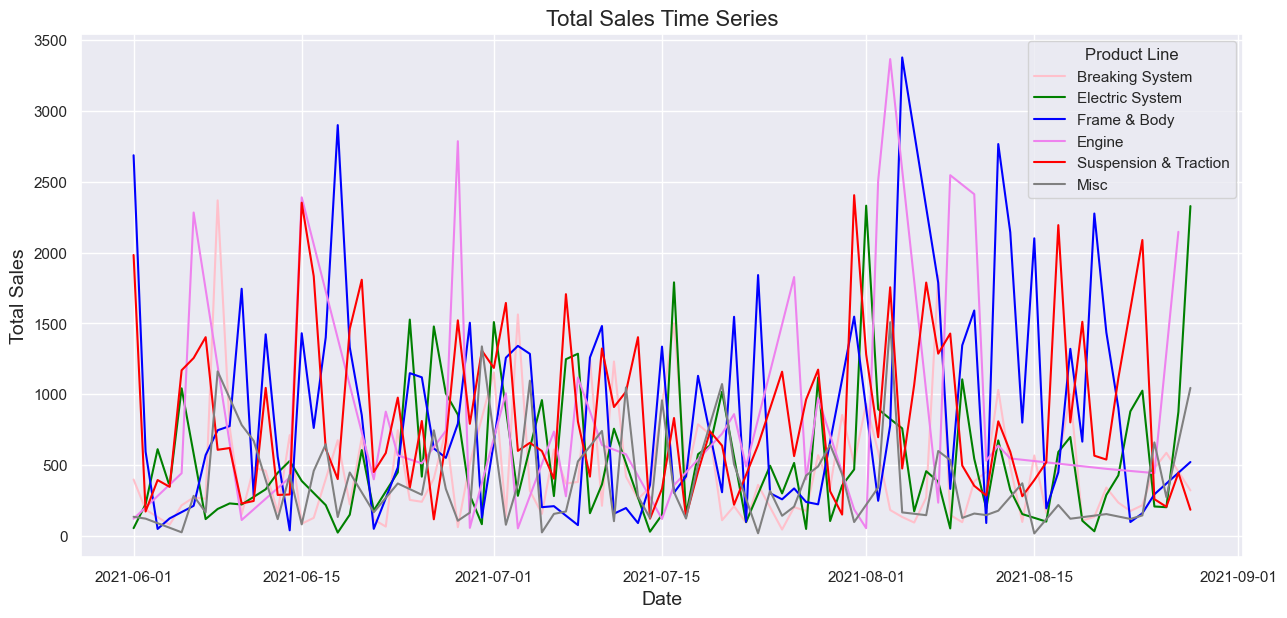

In [14]:
plt.figure(figsize=[15,6.8])
plt.plot(Breaking_system.date,Breaking_system.total,label = "Breaking System", color = "pink")
plt.plot(Electric_system.date,Electric_system.total,label = "Electric System", color = "green")
plt.plot(Frame_body.date,Frame_body.total,label = "Frame & Body", color = "blue")
plt.plot(Engine.date,Engine.total,label = "Engine", color = "violet")
plt.plot(Sus_trac.date,Sus_trac.total,label = "Suspension & Traction", color = "red")
plt.plot(Misc.date,Misc.total,label = "Misc", color = "gray")

plt.legend(title='Product Line')

plt.ylabel('Total Sales', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Total Sales Time Series', fontsize=16)

plt.show()

The overlaps and consistent ups and downs make the image difficult to decipher. However, there may be more sense we can draw from it on a cumulative total revenues basis. We will convert this data and present it in the cumulative fashion shown in the graph underneath.

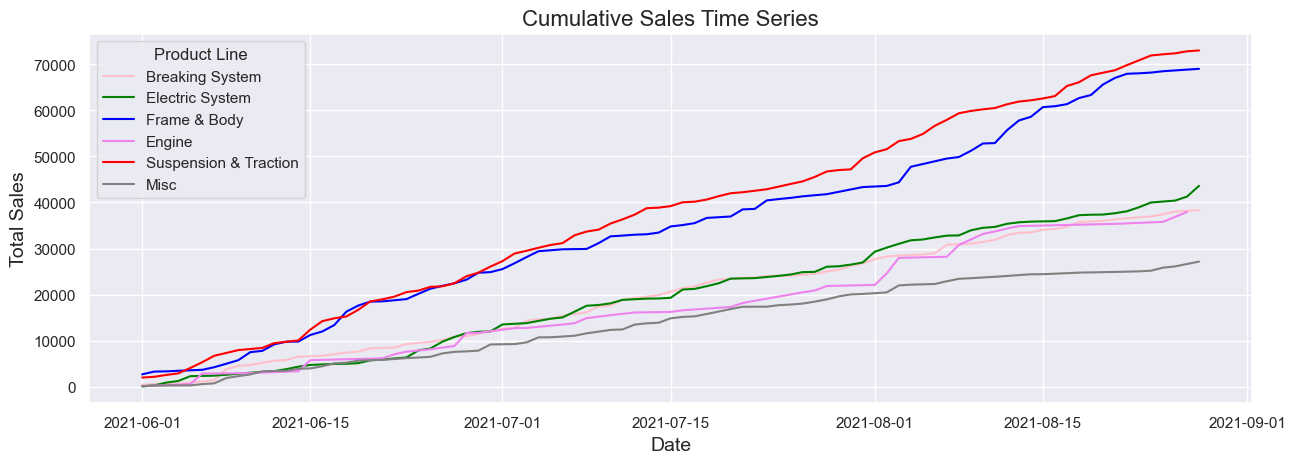

In [15]:
plt.figure(figsize=[15,4.8])
plt.plot(Breaking_system.date,Breaking_system.cumTotal,label = "Breaking System", color = "pink")
plt.plot(Electric_system.date,Electric_system.cumTotal,label = "Electric System", color = "green")
plt.plot(Frame_body.date,Frame_body.cumTotal,label = "Frame & Body", color = "blue")
plt.plot(Engine.date,Engine.cumTotal,label = "Engine", color = "violet")
plt.plot(Sus_trac.date,Sus_trac.cumTotal,label = "Suspension & Traction", color = "red")
plt.plot(Misc.date,Misc.cumTotal,label = "Misc", color = "gray")

plt.legend(title='Product Line')

plt.ylabel('Total Sales', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Cumulative Sales Time Series', fontsize=16)

plt.show()

Implementing Linear Regression to Predict Total Sales Revenue Until the End of 2021

In [16]:
X_Sus_trac = Sus_trac[['date']]
X_Sus_trac.shape

X_Electric_system = Electric_system[['date']]
X_Electric_system.shape

X_Breaking_system = Breaking_system[['date']]
X_Breaking_system.shape

X_Frame_body = Frame_body[['date']]
X_Frame_body.shape

X_Engine = Engine[['date']]
X_Engine.shape

X_Misc = Misc[['date']]
X_Misc.shape;

In [17]:
X_Sus_trac = Sus_trac['date'].map(dt.datetime.toordinal).values.reshape(-1,1)
y_Sus_trac = Sus_trac[['cumTotal']]

X_Electric_system = Electric_system['date'].map(dt.datetime.toordinal).values.reshape(-1,1)
y_Electric_system = Electric_system[['cumTotal']]

X_Breaking_system = Breaking_system['date'].map(dt.datetime.toordinal).values.reshape(-1,1)
y_Breaking_system = Breaking_system[['cumTotal']]

X_Frame_body = Frame_body['date'].map(dt.datetime.toordinal).values.reshape(-1,1)
y_Frame_body = Frame_body[['cumTotal']]

X_Engine = Engine['date'].map(dt.datetime.toordinal).values.reshape(-1,1)
y_Engine = Engine[['cumTotal']]

X_Misc = Misc['date'].map(dt.datetime.toordinal).values.reshape(-1,1)
y_Misc = Misc[['cumTotal']]


In [18]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

In [19]:
variable_Names = ["Sus_trac","Electric_system","Breaking_system","Frame_body","Engine","Misc"]
model_Array_X = [X_Sus_trac, X_Electric_system, X_Breaking_system, X_Frame_body, X_Engine, X_Misc]
model_Array_Y = [y_Sus_trac, y_Electric_system, y_Breaking_system, y_Frame_body, y_Engine, y_Misc]

X_pred_orig = pd.date_range(start='2021-08-28', end='2021-12-30')
X_pred = X_pred_orig.map(dt.datetime.toordinal)
X_pred = X_pred.values.reshape(-1,1)

diction = {}
i = 0
for j in range(0,6): 
    
    name = "model" + variable_Names[i]
    nameX = "modelX_" + variable_Names[i]
    nameY = "modelY_" + variable_Names[i]
    model = LinearRegression()
    model.fit(model_Array_X[i],model_Array_Y[i])
    y_pred = model.predict(X_pred)
    datess = pd.DataFrame(X_pred_orig).rename(columns = {0:"Date"})
    predss = pd.DataFrame(y_pred).rename(columns = {0:"cumTotal"})
    diction[name] = pd.DataFrame({nameX: datess["Date"], nameY: predss["cumTotal"]})
    del model
    i = i + 1


In [20]:
modelSusTrac = diction['modelSus_trac']
modelElectricSys = diction['modelElectric_system']
modelBreaking = diction['modelBreaking_system']
modelFrameBody = diction['modelFrame_body']
modelEngine = diction['modelEngine']
modelMisc = diction['modelMisc']

C:\Users\Syrym\AppData\Local\Temp\ipykernel_5296\3051456904.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(modelBreaking.iloc[-1][0],modelBreaking.iloc[-1][1],"Breaking System = $" + str(round(modelBreaking.iloc[-1][1])))
C:\Users\Syrym\AppData\Local\Temp\ipykernel_5296\3051456904.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(modelElectricSys.iloc[-1][0],modelElectricSys.iloc[-1][1],"Electric System = $" + str(round(modelElectricSys.iloc[-1][1])))
C:\Users\Syrym\AppData\Local\Temp\ipykernel_5296\3051456904.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

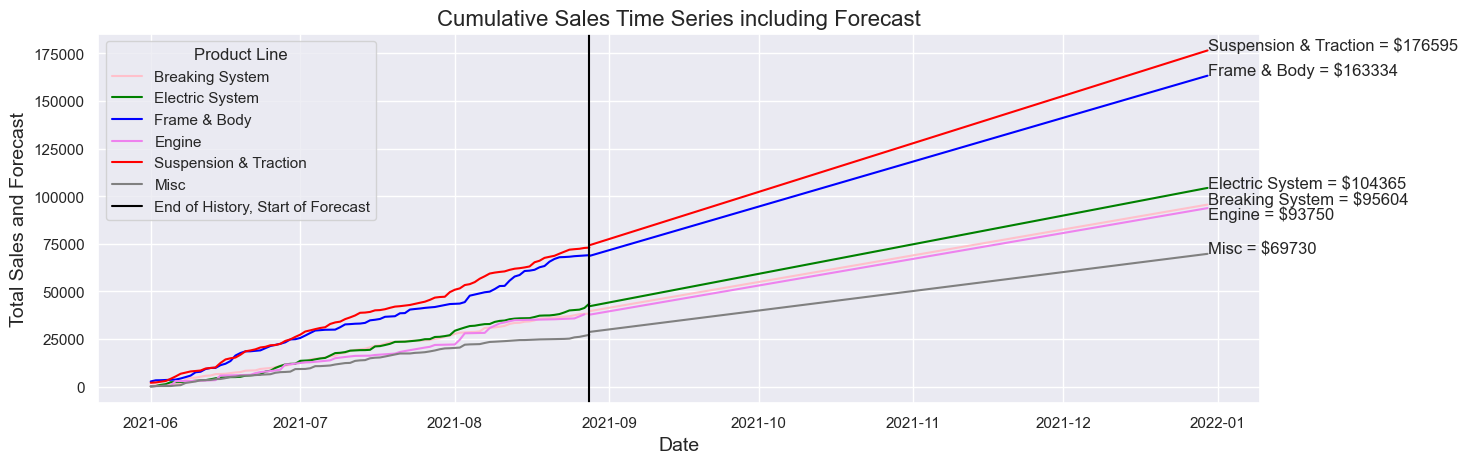

In [21]:
plt.figure(figsize=[15,4.8])
plt.plot(Breaking_system.date,Breaking_system.cumTotal,label = "Breaking System", color = "pink")
plt.plot(Electric_system.date,Electric_system.cumTotal,label = "Electric System", color = "green")
plt.plot(Frame_body.date,Frame_body.cumTotal,label = "Frame & Body", color = "blue")
plt.plot(Engine.date,Engine.cumTotal,label = "Engine", color = "violet")
plt.plot(Sus_trac.date,Sus_trac.cumTotal,label = "Suspension & Traction", color = "red")
plt.plot(Misc.date,Misc.cumTotal,label = "Misc", color = "gray")

plt.plot(modelBreaking.modelX_Breaking_system,modelBreaking.modelY_Breaking_system, color = "pink")
plt.plot(modelElectricSys.modelX_Electric_system,modelElectricSys.modelY_Electric_system, color = "green")
plt.plot(modelFrameBody.modelX_Frame_body,modelFrameBody.modelY_Frame_body, color = "blue")
plt.plot(modelEngine.modelX_Engine,modelEngine.modelY_Engine, color = "violet")
plt.plot(modelSusTrac.modelX_Sus_trac,modelSusTrac.modelY_Sus_trac, color = "red")
plt.plot(modelMisc.modelX_Misc,modelMisc.modelY_Misc, color = "gray")
plt.axvline(x=modelBreaking.modelX_Breaking_system[0], color = "black", label = "End of History, Start of Forecast")

plt.text(modelBreaking.iloc[-1][0],modelBreaking.iloc[-1][1],"Breaking System = $" + str(round(modelBreaking.iloc[-1][1])))
plt.text(modelElectricSys.iloc[-1][0],modelElectricSys.iloc[-1][1],"Electric System = $" + str(round(modelElectricSys.iloc[-1][1])))
plt.text(modelFrameBody.iloc[-1][0],modelFrameBody.iloc[-1][1],"Frame & Body = $" + str(round(modelFrameBody.iloc[-1][1])))
plt.text(modelEngine.iloc[-1][0],modelEngine.iloc[-1][1]-6000,"Engine = $" + str(round(modelEngine.iloc[-1][1])))
plt.text(modelSusTrac.iloc[-1][0],modelSusTrac.iloc[-1][1],"Suspension & Traction = $" + str(round(modelSusTrac.iloc[-1][1])))
plt.text(modelMisc.iloc[-1][0],modelMisc.iloc[-1][1],"Misc = $" + str(round(modelMisc.iloc[-1][1])))

plt.legend(title='Product Line')

plt.ylabel('Total Sales and Forecast', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Cumulative Sales Time Series including Forecast', fontsize=16)

plt.show()


The graph contains the historical data on a per product line basis, which ends towards the end of August 2021 (highlighted by the vertical black line). After this comes the forecast. All projections move upward, and you may find each product lines expected revenues at the end of the year on the graph as well.